### Mackey glass modelling synthetic data

#### ESN with default parameters

test error: 
0.30284927641340703


(9000, 11000)

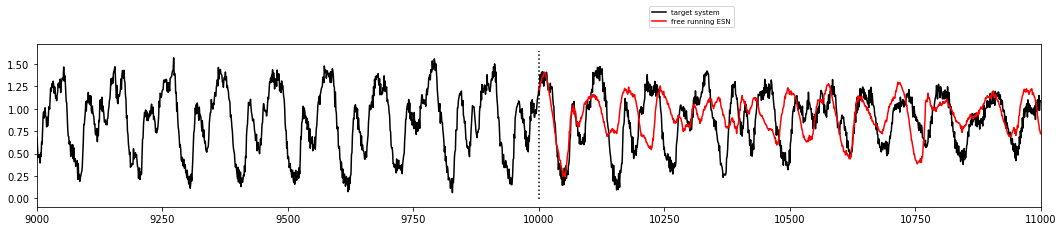

In [67]:
import numpy as np

import sys
sys.path.append('../Code/pyESN-master/')
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('../../Data/Synthetic/Mackey_Glass/Dynamic/mackey_glass_dynamic_with_random_shocks_1.npy')


esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 900,
          noise=0.05,
          spectral_radius = 1.8,
          random_state=42)


trainlen = 10000
future = 1000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))


skip_from_train = 9000
plt.figure(figsize=(18,3))
plt.plot(range(skip_from_train,trainlen+future),data[skip_from_train:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')
plt.xlim(skip_from_train, trainlen+future)

In [20]:
len(data)

11000

In [23]:
import pandas as pd

In [50]:
data_ = pd.read_csv('../../Data/Coins/BTC_USD/Daily_aggregated/daily_aggs_tech_indicators.csv')

In [51]:
data_.head(1)

,date,vol_cur,vol_btc,close,open,high,low,vwa_close,vwa_open,vwa_high,vwa_low,vwa_pr,lr_vwa_pr,count_non_na_mins
0,2011-12-31,425.320338,95.317878,4.58,4.39,4.58,4.39,4.47944,4.451634,4.47944,4.451634,4.46338,NaN,23.82947


In [57]:
data = data_['lr_vwa_pr'].dropna().values

train error: 
0.03287557792274108
test error: 
0.036552399911865374


(2550, 2650)

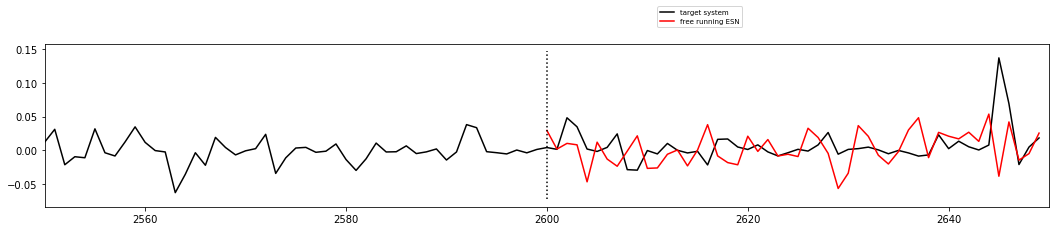

In [65]:
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 700,
          noise=0.1,
          spectral_radius = 1.6,
          random_state=42)


trainlen = 2600
future = 50
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])


print("train error: \n"+str(np.sqrt(np.mean((pred_training.flatten() - data[0:trainlen])**2))))
prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))


skip_from_train = 2550
plt.figure(figsize=(18,3))
plt.plot(range(skip_from_train,trainlen+future),data[skip_from_train:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')
plt.xlim(skip_from_train, trainlen+future)

In [56]:
data

array([        nan,  0.0932221 ,  0.02030946, ..., -0.02375873,
       -0.0144649 ,  0.01465799])